# Visualization of velocity for video-confimed events

In [1]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

path = '../datasets/preprocessed/'
dfrat     = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior').set_index('index')
dfevent   = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
dfsession = pd.read_hdf(path+'relationalDatabase.h5', 'Sessions')

dfratclean = pd.read_hdf(path+'filteredDatabase.h5', 'Rat_Behavior').set_index('index')
dfratv = pd.read_hdf(path+'velocityDatabase.h5', 'Rat_Behavior').set_index('index')

In [2]:
dfratv.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,dT,lVo,lx1,lz1,V1,V1_ori,lx1_ori,lz1_ori,theta,U
index,,,,,,,,,,,,,,,,,,,
1,655,2.729167,0.002050,0.100554,0.037935,-0.158835,-0.154542,0.658703,0,0.004167,236.28559,-0.234414,0.972137,0.002868,0.677583,-55.388703,229.701919,-0.021824,-300.078558
2,656,2.733334,0.003672,0.100841,0.038550,-0.143174,-0.150851,0.657018,0,0.004167,236.28559,-0.212918,0.977070,0.002846,0.672437,-50.309523,230.867564,-0.022055,-303.256384
3,657,2.737500,0.005299,0.101125,0.039161,-0.127507,-0.147160,0.655308,0,0.004166,236.28559,-0.190994,0.981591,0.002825,0.667598,-45.129075,231.935868,-0.022386,-307.883196
4,658,2.741667,0.006931,0.101406,0.039767,-0.111809,-0.143439,0.653580,0,0.004167,236.28559,-0.168622,0.985681,0.002806,0.663075,-39.842925,232.902171,-0.022743,-312.714658
5,659,2.745834,0.008570,0.101685,0.040368,-0.096066,-0.139570,0.651787,0,0.004167,236.28559,-0.145813,0.989312,0.002788,0.658829,-34.453478,233.760215,-0.023097,-317.578633


In [31]:
dfsession

,index,session_id,rat_id,date,experimenter,original_name,video_name,VRspeed
0,0,0,VR-5A,2017-07-13 05.09.09.088 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_17-09-07_VR-5A_NIC,VRAcuityExp_2017-07-13_17-09-07_VR-5A_NIC-Came...,[ 0. 7. 14. 28.]
1,0,1,VR-3A,2017-07-13 04.11.56.036 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_16-11-46_VR-3A_NIC,VRAcuityExp_2017-07-13_16-11-46_VR-3A_NIC-Came...,[ 0. 7. 14. 28.]
2,0,2,VR-3A,2017-07-13 04.27.09.355 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_16-27-08_VR-3A_NIC,VRAcuityExp_2017-07-13_16-27-08_VR-3A_NIC-Came...,[ 0. 7. 14. 28.]
3,0,3,VR-4A,2017-07-13 02.39.20.315 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC,VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC-Came...,[ 0. 7. 14. 28.]
4,0,4,VR-2A,2017-07-13 03.19.28.235 PM,Eduardo Blanco-Hernandez,VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU,VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU-Came...,[ 0. 7. 14. 28.]
5,0,5,VR-1B,2017-07-13 03.53.42.156 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_15-53-40_VR-1B_NIC,VRAcuityExp_2017-07-13_15-53-40_VR-1B_NIC-Came...,[ 0. 7. 14. 28.]
6,0,6,VR-2B,2017-07-13 03.05.18.468 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_15-05-16_VR-2B_NIC,VRAcuityExp_2017-07-13_15-05-16_VR-2B_NIC-Came...,[ 0. 7. 14. 28.]
7,0,7,VR-1A,2017-07-13 03.38.35.628 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_15-38-34_VR-1A_NIC,VRAcuityExp_2017-07-13_15-38-34_VR-1A_NIC-Came...,[ 0. 7. 14. 28.]


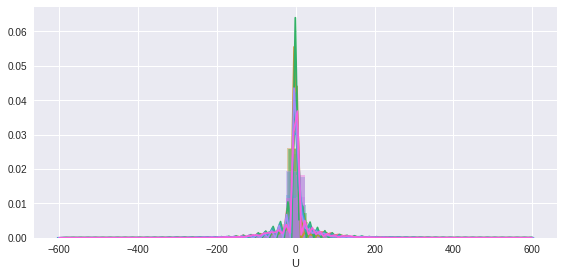

In [4]:
g = sns.FacetGrid(hue='session_id', data=dfratv, size=4, aspect=2)
g.map(sns.distplot, 'U');


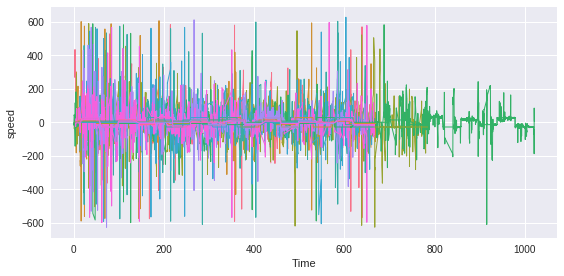

In [5]:
df = pd.merge(dfratv, dfevent, on=['Frame', 'session_id','Time'])


df['subU'] = df['speed'] - df['U'] 

g = sns.FacetGrid(data=df, size=4, aspect=2, hue='session_id')
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);


## Experiment 0

In [6]:
dd0 = df[df['session_id']==0]

In [7]:
dfsession.video_name[0]

'VRAcuityExp_2017-07-13_17-09-07_VR-5A_NIC-Camera 11136'

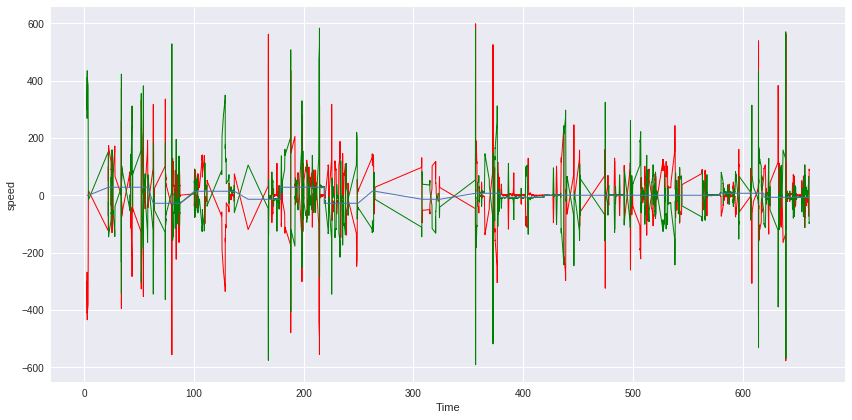

In [8]:
g = sns.FacetGrid(data=dd0, size=6, aspect=2)
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);


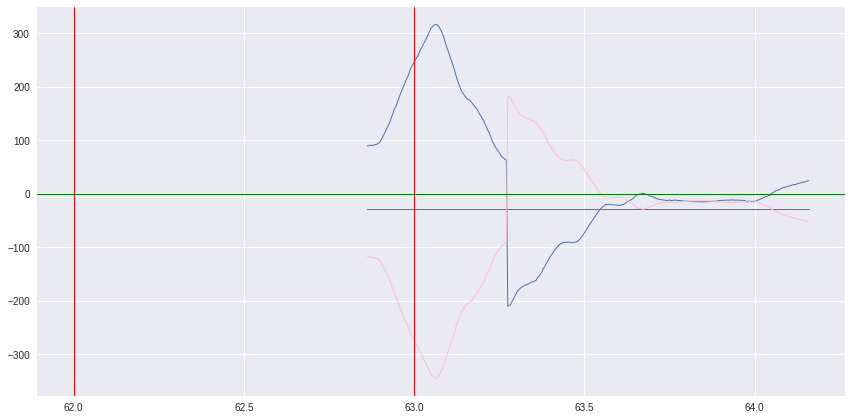

In [9]:
## 62-63
dpart = dd0[(dd0['Time']>59) & (dd0['Time']<65)]
xmin, xmax = 62, 63

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


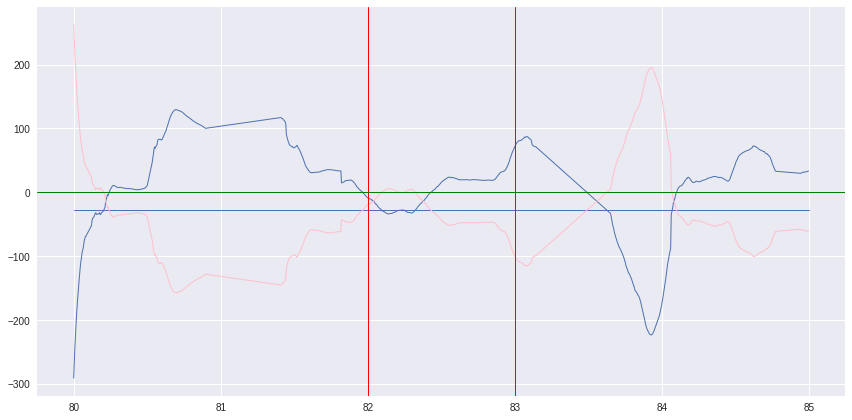

In [10]:
## 81 - 83
dpart = dd0[(dd0['Time']>80) & (dd0['Time']<85)]
xmin, xmax = 82, 83

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');



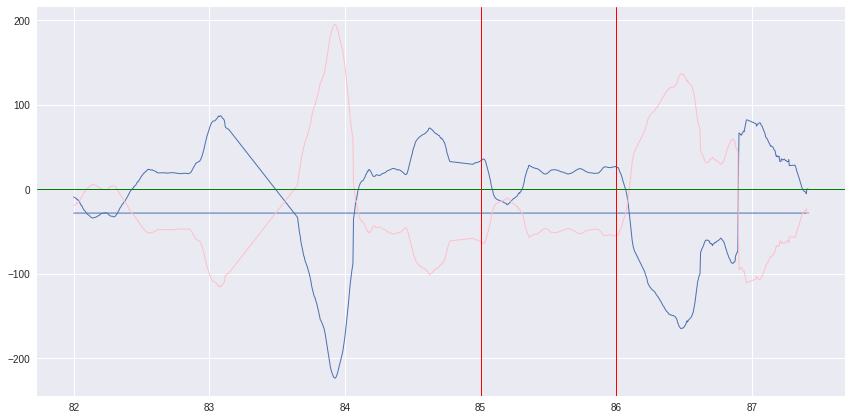

In [11]:
## 85 - 86
dpart = dd0[(dd0['Time']>82) & (dd0['Time']<90)]
xmin, xmax = 85, 86

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


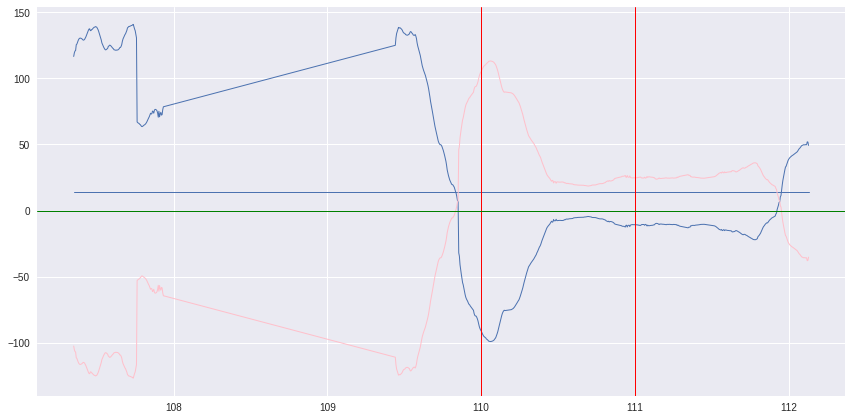

In [12]:
## 110 - 111
dpart = dd0[(dd0['Time']>107) & (dd0['Time']<114)]
xmin, xmax = 110, 111

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


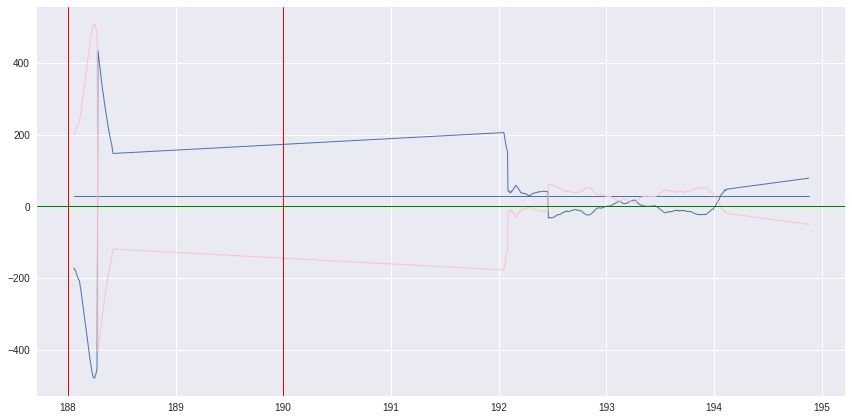

In [13]:
## 188 - 190
dpart = dd0[(dd0['Time']>185) & (dd0['Time']<195)]
xmin, xmax = 188, 190

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

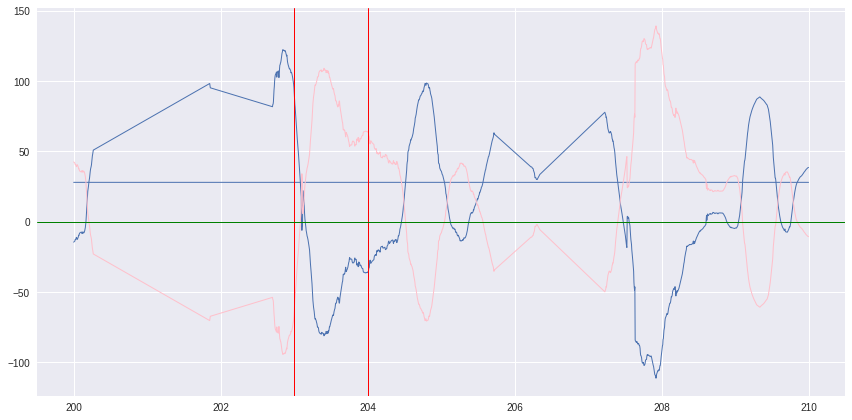

In [14]:
## 203 - 204
dpart = dd0[(dd0['Time']>200) & (dd0['Time']<210)]
xmin, xmax = 203, 204

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


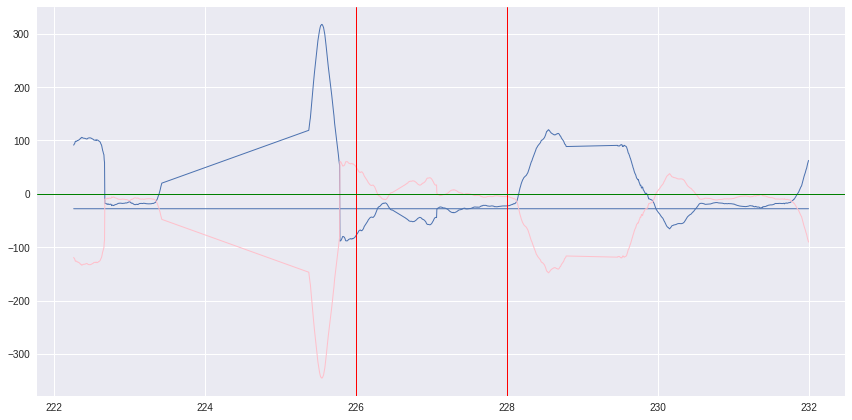

In [15]:
## 226 - 228
dpart = dd0[(dd0['Time']>222) & (dd0['Time']<232)]
xmin, xmax = 226, 228

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


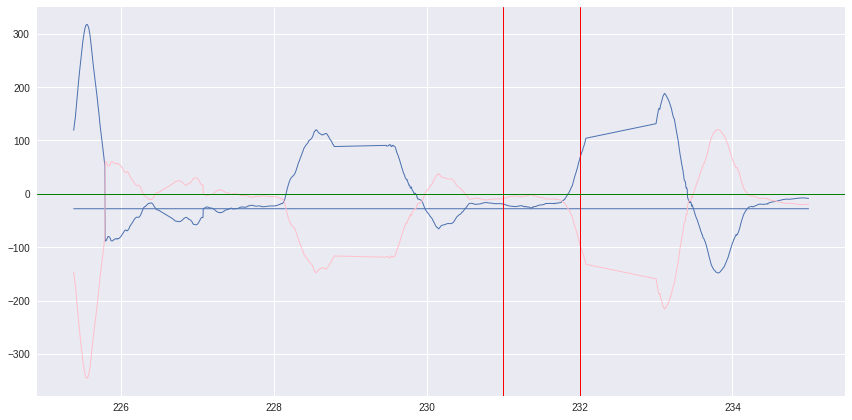

In [16]:
## 231, 232
dpart = dd0[(dd0['Time']>225) & (dd0['Time']<235)]
xmin, xmax = 231, 232

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


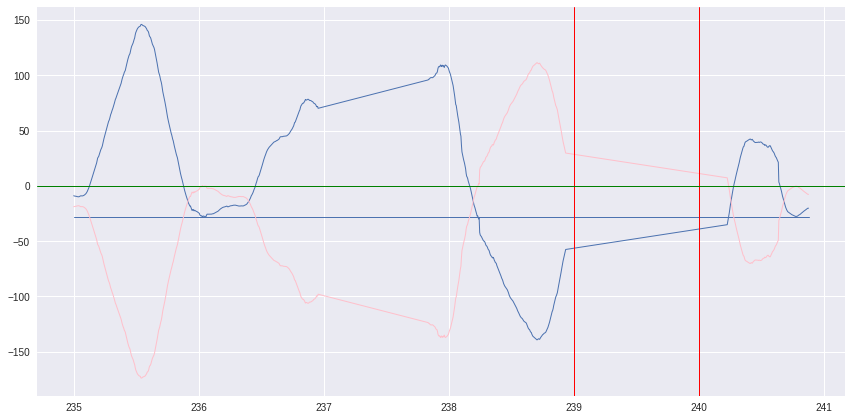

In [17]:
## 239, 240
dpart = dd0[(dd0['Time']>235) & (dd0['Time']<245)]
xmin, xmax = 239, 240

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');



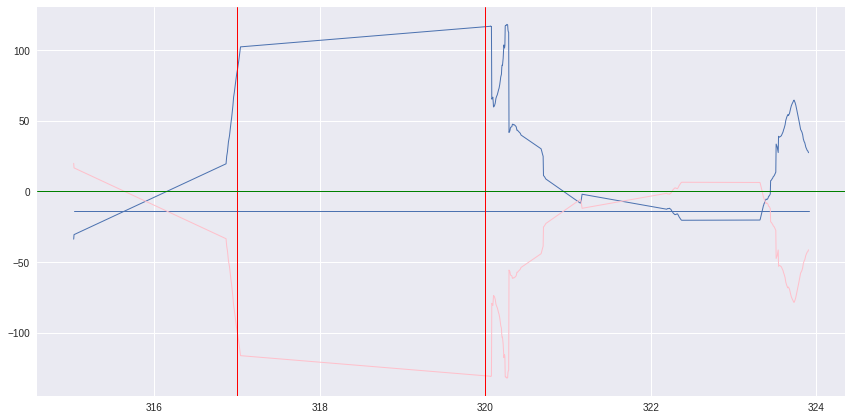

In [18]:
## 317, 320
dpart = dd0[(dd0['Time']>315) & (dd0['Time']<325)]
xmin, xmax = 317, 320

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

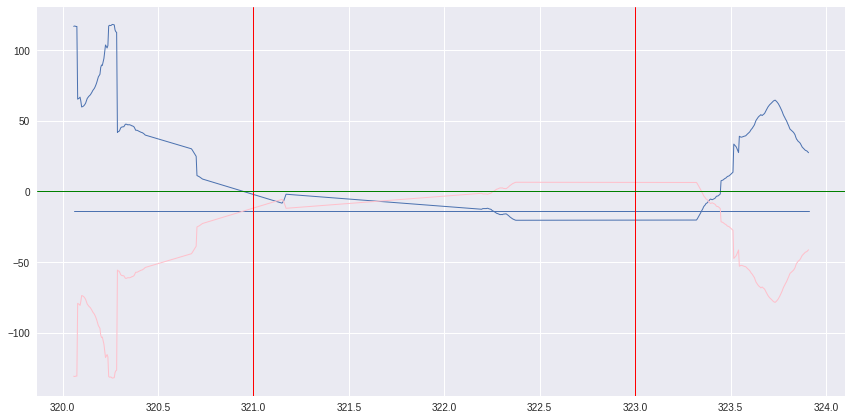

In [19]:
## 321, 323
dpart = dd0[(dd0['Time']>318) & (dd0['Time']<328)]
xmin, xmax = 321, 323

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

## Experiment 1

In [20]:
dd1 = df[df['session_id']==1]

In [21]:
dfsession.video_name[1]

'VRAcuityExp_2017-07-13_16-11-46_VR-3A_NIC-Camera 11136'

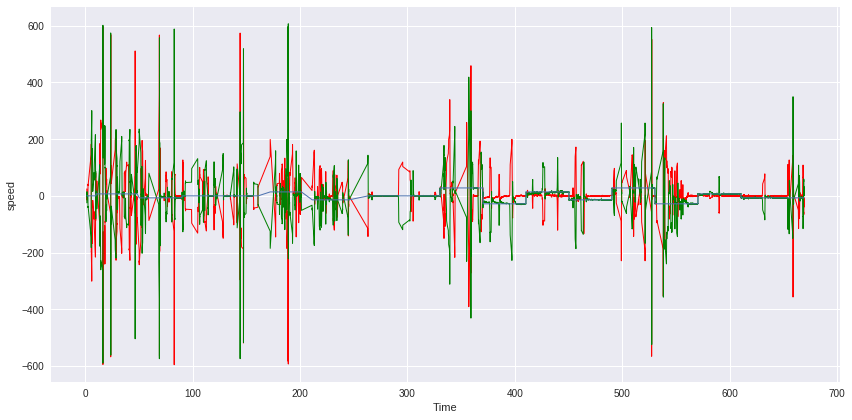

In [22]:
g = sns.FacetGrid(data=dd1, size=6, aspect=2)
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);


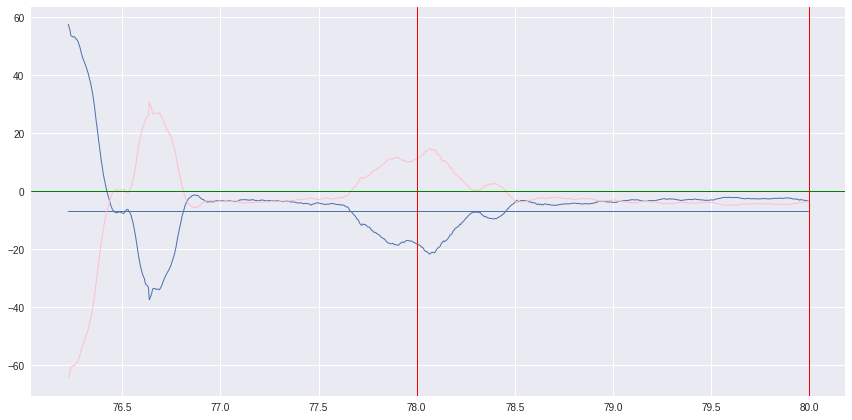

In [23]:
## 78, 80
dpart = dd1[(dd1['Time']>76) & (dd1['Time']<80)]
xmin, xmax = 78, 80

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

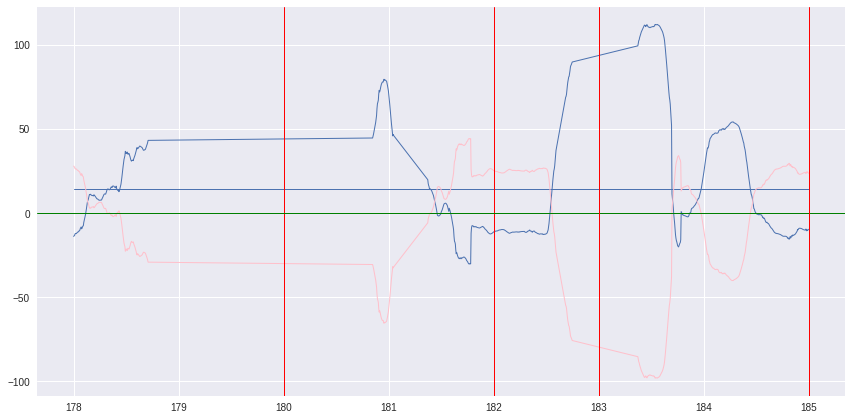

In [24]:
## 180, 182; 183, 185
dpart = dd1[(dd1['Time']>178) & (dd1['Time']<185)]
xmin, xmax = 180, 182

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

xmin, xmax = 183, 185
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');


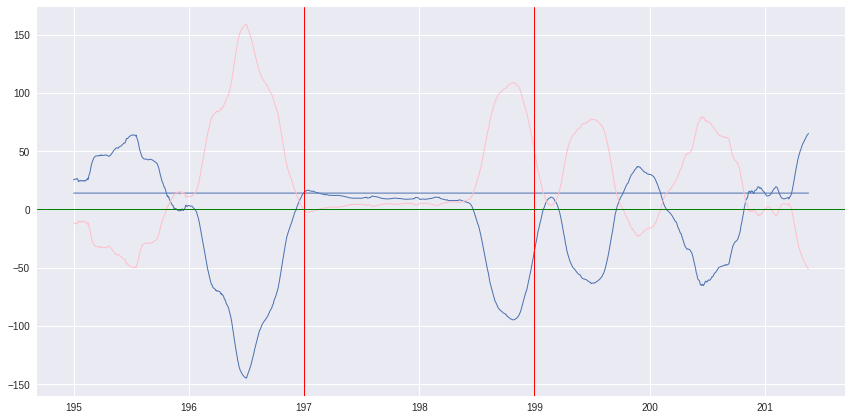

In [25]:
## 197, 199
dpart = dd1[(dd1['Time']>195) & (dd1['Time']<202)]
xmin, xmax = 197, 199

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

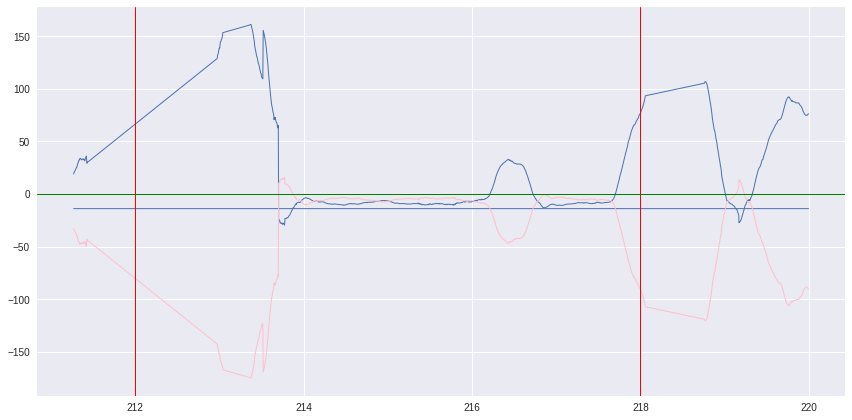

In [26]:
## 212, 218
dpart = dd1[(dd1['Time']>210) & (dd1['Time']<220)]
xmin, xmax = 212, 218

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

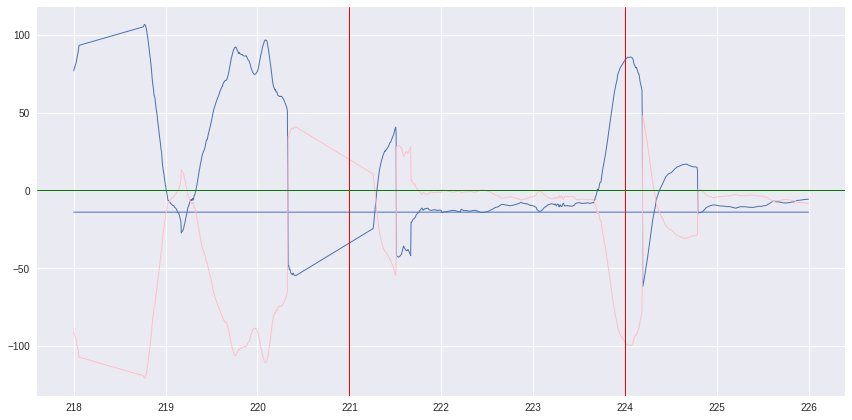

In [27]:
## 221, 224
dpart = dd1[(dd1['Time']>218) & (dd1['Time']<226)]
xmin, xmax = 221, 224

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

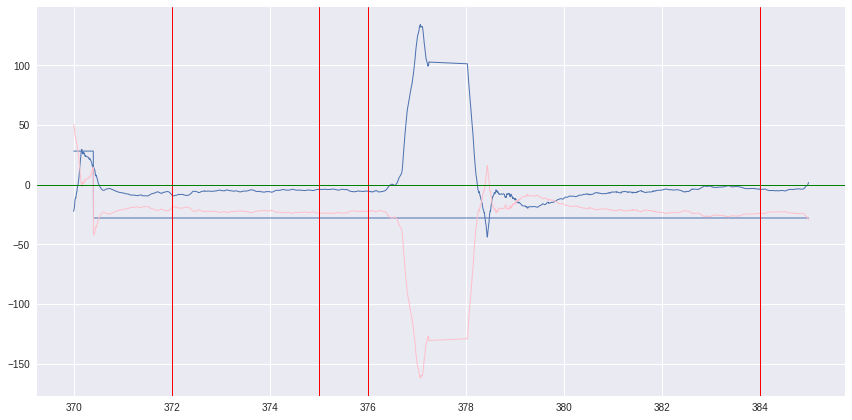

In [28]:
## 372, 376
dpart = dd1[(dd1['Time']>370) & (dd1['Time']<385)]
xmin, xmax = 372, 376

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

xmin, xmax = 375, 384
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');


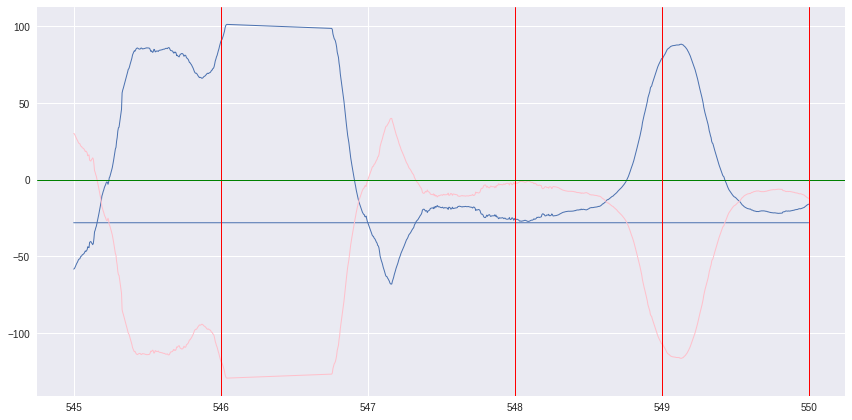

In [29]:
## 546, 548, 549, 550
dpart = dd1[(dd1['Time']>545) & (dd1['Time']<550)]
xmin, xmax = 546, 548

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

xmin, xmax = 549, 550

g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');


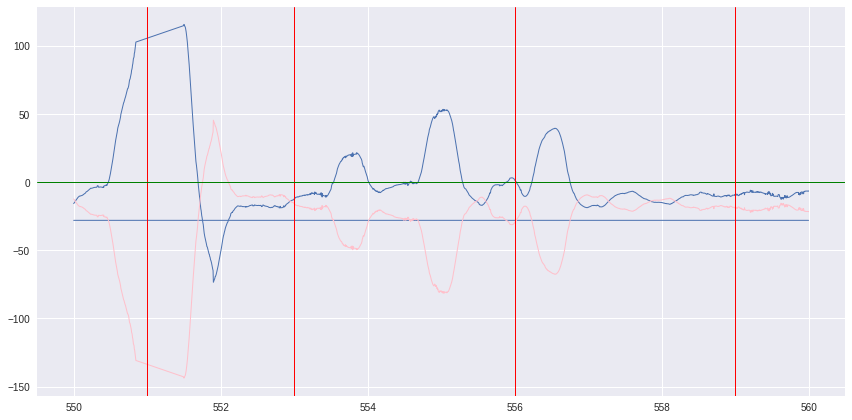

In [30]:
## 551, 553
dpart = dd1[(dd1['Time']>550) & (dd1['Time']<560)]
xmin, xmax = 551, 553

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

xmin, xmax = 556, 559
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
